In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
# https://debuggercafe.com/vanilla-gan-pytorch/

In [3]:
# fxn for plotting
def get_ax(f_size=15, figsize=(6,4)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    return f_size, ax

# Define learning parameters

In [4]:
# learning parameters
batch_size = 512
epochs = 100 #100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [5]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs already exists.
Error occurred while processing: outputs.


# Generator

In [6]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [7]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [8]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [9]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [10]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [11]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [12]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)

In [13]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [14]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [15]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:40,  2.93it/s]                                                                                               


Epoch 1 of 100
Generator loss: 1.44981874, Discriminator loss: 0.88485976


118it [00:39,  3.01it/s]                                                                                               


Epoch 2 of 100
Generator loss: 2.53511177, Discriminator loss: 1.38149412


118it [00:39,  2.97it/s]                                                                                               


Epoch 3 of 100
Generator loss: 5.83871307, Discriminator loss: 0.22843374


118it [00:40,  2.90it/s]                                                                                               


Epoch 4 of 100
Generator loss: 4.27792136, Discriminator loss: 0.76031670


118it [00:41,  2.86it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


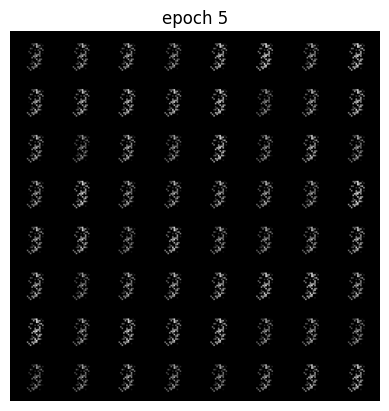

Epoch 5 of 100
Generator loss: 2.22094409, Discriminator loss: 1.18392159


118it [00:39,  2.95it/s]                                                                                               


Epoch 6 of 100
Generator loss: 3.65037056, Discriminator loss: 0.71971764


118it [00:39,  2.99it/s]                                                                                               


Epoch 7 of 100
Generator loss: 1.26616147, Discriminator loss: 1.20772329


118it [00:38,  3.06it/s]                                                                                               


Epoch 8 of 100
Generator loss: 1.60593965, Discriminator loss: 0.98788041


118it [00:38,  3.06it/s]                                                                                               


Epoch 9 of 100
Generator loss: 1.93785623, Discriminator loss: 0.81916070


118it [00:38,  3.04it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


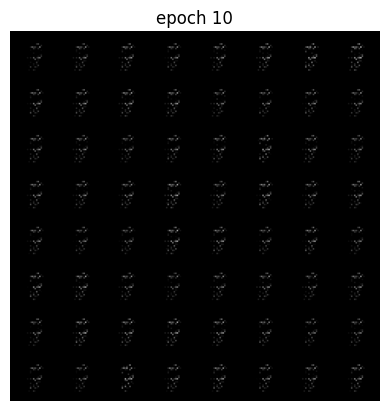

Epoch 10 of 100
Generator loss: 1.52695423, Discriminator loss: 1.11922141


118it [00:38,  3.08it/s]                                                                                               


Epoch 11 of 100
Generator loss: 1.61531698, Discriminator loss: 1.08377942


118it [00:38,  3.07it/s]                                                                                               


Epoch 12 of 100
Generator loss: 2.07170890, Discriminator loss: 0.92633661


118it [00:38,  3.06it/s]                                                                                               


Epoch 13 of 100
Generator loss: 2.22055651, Discriminator loss: 1.17114466


118it [00:38,  3.07it/s]                                                                                               


Epoch 14 of 100
Generator loss: 3.12218868, Discriminator loss: 0.96021594


118it [00:38,  3.07it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


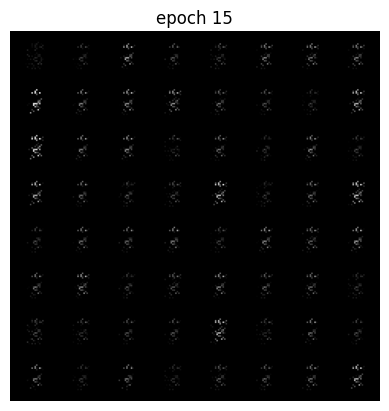

Epoch 15 of 100
Generator loss: 1.74770927, Discriminator loss: 0.91641534


118it [00:38,  3.05it/s]                                                                                               


Epoch 16 of 100
Generator loss: 2.26301112, Discriminator loss: 0.66715070


118it [00:38,  3.07it/s]                                                                                               


Epoch 17 of 100
Generator loss: 2.06034814, Discriminator loss: 0.96178016


118it [00:38,  3.07it/s]                                                                                               


Epoch 18 of 100
Generator loss: 1.88266602, Discriminator loss: 0.83835765


118it [00:38,  3.07it/s]                                                                                               


Epoch 19 of 100
Generator loss: 1.68677846, Discriminator loss: 0.90719423


118it [00:37,  3.15it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


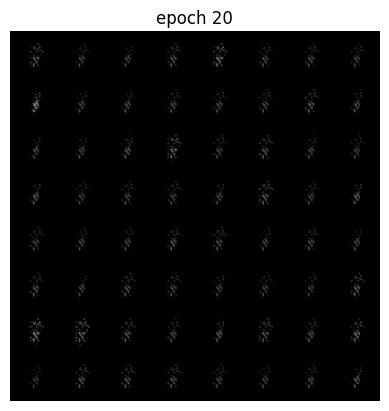

Epoch 20 of 100
Generator loss: 2.34236952, Discriminator loss: 0.75925464


118it [00:37,  3.14it/s]                                                                                               


Epoch 21 of 100
Generator loss: 2.46605354, Discriminator loss: 0.88750315


118it [00:37,  3.14it/s]                                                                                               


Epoch 22 of 100
Generator loss: 2.30790217, Discriminator loss: 0.54375176


118it [00:37,  3.15it/s]                                                                                               


Epoch 23 of 100
Generator loss: 2.72100436, Discriminator loss: 0.55638052


118it [00:37,  3.16it/s]                                                                                               


Epoch 24 of 100
Generator loss: 2.24772094, Discriminator loss: 0.80349821


118it [00:37,  3.13it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


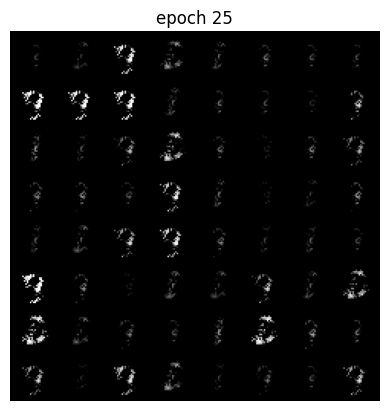

Epoch 25 of 100
Generator loss: 2.54655949, Discriminator loss: 0.58658187


118it [00:39,  3.02it/s]                                                                                               


Epoch 26 of 100
Generator loss: 2.53584592, Discriminator loss: 0.61478412


118it [00:38,  3.04it/s]                                                                                               


Epoch 27 of 100
Generator loss: 2.77743354, Discriminator loss: 0.64379755


118it [00:38,  3.05it/s]                                                                                               


Epoch 28 of 100
Generator loss: 2.75310285, Discriminator loss: 0.56082838


118it [00:39,  3.01it/s]                                                                                               


Epoch 29 of 100
Generator loss: 2.76100189, Discriminator loss: 0.53390139


118it [00:38,  3.03it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


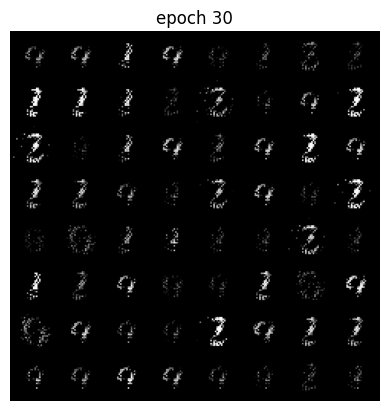

Epoch 30 of 100
Generator loss: 2.91105905, Discriminator loss: 0.60116579


118it [00:39,  2.99it/s]                                                                                               


Epoch 31 of 100
Generator loss: 2.99125728, Discriminator loss: 0.43392778


118it [00:39,  3.02it/s]                                                                                               


Epoch 32 of 100
Generator loss: 2.75823927, Discriminator loss: 0.54203873


118it [00:39,  2.99it/s]                                                                                               


Epoch 33 of 100
Generator loss: 2.69698197, Discriminator loss: 0.59930369


118it [00:38,  3.06it/s]                                                                                               


Epoch 34 of 100
Generator loss: 2.76295267, Discriminator loss: 0.44409320


118it [00:39,  2.99it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


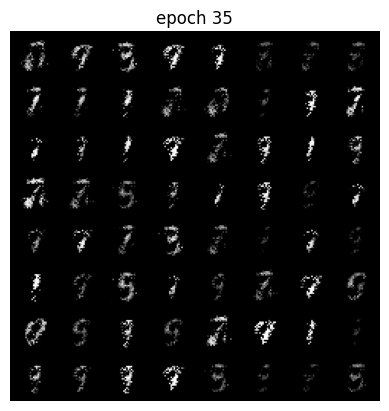

Epoch 35 of 100
Generator loss: 2.41901795, Discriminator loss: 0.62910075


118it [00:38,  3.06it/s]                                                                                               


Epoch 36 of 100
Generator loss: 2.56724782, Discriminator loss: 0.64968954


118it [00:38,  3.08it/s]                                                                                               


Epoch 37 of 100
Generator loss: 2.56089008, Discriminator loss: 0.64079640


118it [00:38,  3.07it/s]                                                                                               


Epoch 38 of 100
Generator loss: 2.46358326, Discriminator loss: 0.55759071


118it [00:38,  3.03it/s]                                                                                               


Epoch 39 of 100
Generator loss: 2.48325037, Discriminator loss: 0.61012552


118it [00:38,  3.03it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


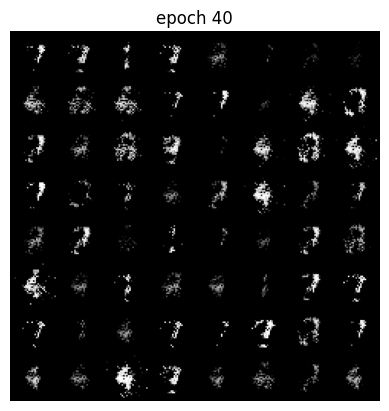

Epoch 40 of 100
Generator loss: 2.75439059, Discriminator loss: 0.52618580


118it [00:39,  2.99it/s]                                                                                               


Epoch 41 of 100
Generator loss: 3.07285952, Discriminator loss: 0.44960345


118it [00:39,  2.98it/s]                                                                                               


Epoch 42 of 100
Generator loss: 2.90912780, Discriminator loss: 0.55546870


118it [00:39,  3.00it/s]                                                                                               


Epoch 43 of 100
Generator loss: 3.01395220, Discriminator loss: 0.50179332


118it [00:39,  2.99it/s]                                                                                               


Epoch 44 of 100
Generator loss: 2.91124157, Discriminator loss: 0.57479086


118it [00:39,  3.01it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


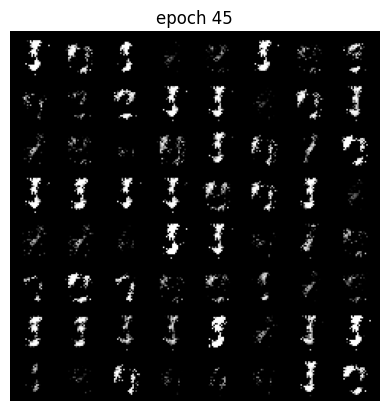

Epoch 45 of 100
Generator loss: 2.85549037, Discriminator loss: 0.44878624


118it [00:39,  3.00it/s]                                                                                               


Epoch 46 of 100
Generator loss: 3.09872174, Discriminator loss: 0.46011561


118it [00:39,  3.00it/s]                                                                                               


Epoch 47 of 100
Generator loss: 3.08867317, Discriminator loss: 0.46610644


118it [00:39,  3.00it/s]                                                                                               


Epoch 48 of 100
Generator loss: 2.88742050, Discriminator loss: 0.58905542


118it [00:38,  3.07it/s]                                                                                               


Epoch 49 of 100
Generator loss: 2.46089840, Discriminator loss: 0.65961212


118it [00:38,  3.09it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


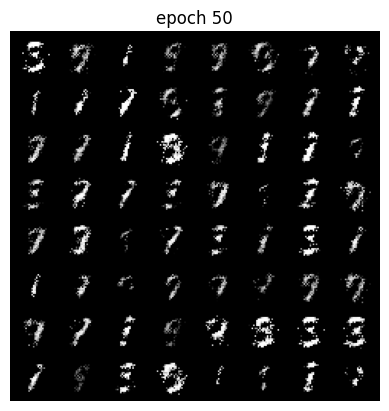

Epoch 50 of 100
Generator loss: 2.68805061, Discriminator loss: 0.57974241


118it [00:38,  3.08it/s]                                                                                               


Epoch 51 of 100
Generator loss: 3.02782896, Discriminator loss: 0.48630909


118it [00:38,  3.10it/s]                                                                                               


Epoch 52 of 100
Generator loss: 2.84035600, Discriminator loss: 0.63497146


118it [00:39,  3.02it/s]                                                                                               


Epoch 53 of 100
Generator loss: 2.93128102, Discriminator loss: 0.54660307


118it [00:39,  3.01it/s]                                                                                               


Epoch 54 of 100
Generator loss: 2.91942996, Discriminator loss: 0.57739354


118it [00:39,  3.01it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


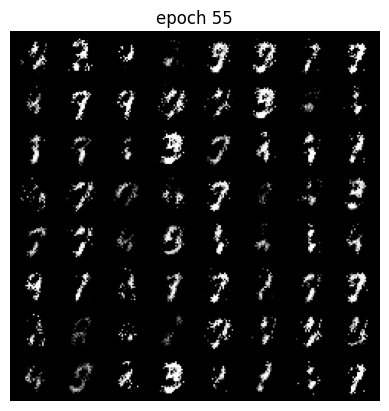

Epoch 55 of 100
Generator loss: 2.72830839, Discriminator loss: 0.58560519


118it [00:39,  2.99it/s]                                                                                               


Epoch 56 of 100
Generator loss: 2.52841888, Discriminator loss: 0.61637460


118it [00:39,  2.99it/s]                                                                                               


Epoch 57 of 100
Generator loss: 2.45049587, Discriminator loss: 0.63276392


118it [00:39,  3.01it/s]                                                                                               


Epoch 58 of 100
Generator loss: 2.43179354, Discriminator loss: 0.59856403


118it [00:39,  2.97it/s]                                                                                               


Epoch 59 of 100
Generator loss: 2.47621007, Discriminator loss: 0.61530021


118it [00:39,  3.00it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


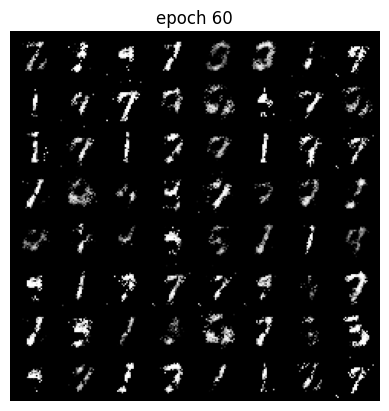

Epoch 60 of 100
Generator loss: 2.44611589, Discriminator loss: 0.58636558


118it [00:39,  2.97it/s]                                                                                               


Epoch 61 of 100
Generator loss: 2.53334978, Discriminator loss: 0.59501200


118it [00:40,  2.95it/s]                                                                                               


Epoch 62 of 100
Generator loss: 2.46725057, Discriminator loss: 0.60859353


118it [00:39,  3.02it/s]                                                                                               


Epoch 63 of 100
Generator loss: 2.54535721, Discriminator loss: 0.56654770


118it [00:39,  3.00it/s]                                                                                               


Epoch 64 of 100
Generator loss: 2.24378048, Discriminator loss: 0.68087431


118it [00:39,  2.96it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


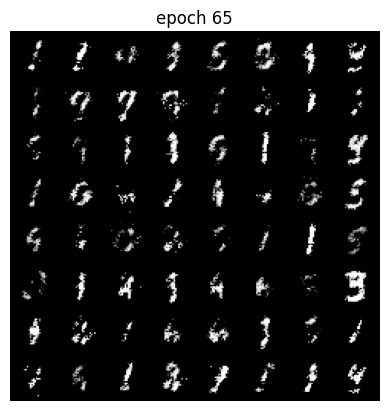

Epoch 65 of 100
Generator loss: 2.37598989, Discriminator loss: 0.63792024


118it [00:39,  2.96it/s]                                                                                               


Epoch 66 of 100
Generator loss: 2.28008242, Discriminator loss: 0.68178266


118it [00:39,  2.98it/s]                                                                                               


Epoch 67 of 100
Generator loss: 2.45492804, Discriminator loss: 0.61180306


118it [00:39,  3.00it/s]                                                                                               


Epoch 68 of 100
Generator loss: 2.38225667, Discriminator loss: 0.66343257


118it [00:39,  2.98it/s]                                                                                               


Epoch 69 of 100
Generator loss: 2.27667289, Discriminator loss: 0.65986766


118it [00:39,  3.01it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


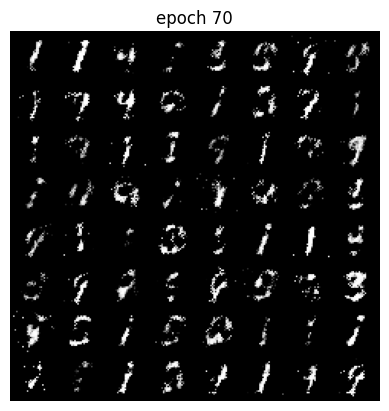

Epoch 70 of 100
Generator loss: 2.37228699, Discriminator loss: 0.66227115


118it [00:38,  3.04it/s]                                                                                               


Epoch 71 of 100
Generator loss: 2.43097415, Discriminator loss: 0.64045623


118it [00:38,  3.04it/s]                                                                                               


Epoch 72 of 100
Generator loss: 2.35276678, Discriminator loss: 0.65562754


118it [00:38,  3.03it/s]                                                                                               


Epoch 73 of 100
Generator loss: 2.39820167, Discriminator loss: 0.67694627


118it [00:40,  2.89it/s]                                                                                               


Epoch 74 of 100
Generator loss: 2.22339683, Discriminator loss: 0.69643189


118it [00:40,  2.91it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


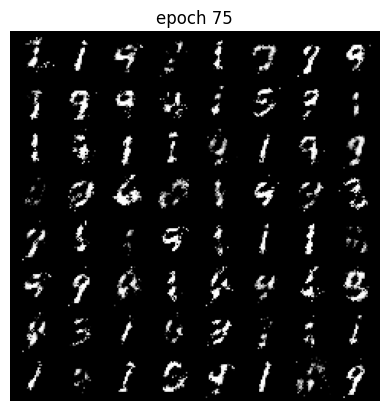

Epoch 75 of 100
Generator loss: 2.19510580, Discriminator loss: 0.70035896


118it [00:39,  3.01it/s]                                                                                               


Epoch 76 of 100
Generator loss: 2.35754580, Discriminator loss: 0.71287470


118it [00:38,  3.04it/s]                                                                                               


Epoch 77 of 100
Generator loss: 2.20001899, Discriminator loss: 0.72802323


118it [00:38,  3.04it/s]                                                                                               


Epoch 78 of 100
Generator loss: 2.33873253, Discriminator loss: 0.72553159


118it [00:38,  3.03it/s]                                                                                               


Epoch 79 of 100
Generator loss: 2.11763101, Discriminator loss: 0.70961632


118it [00:38,  3.03it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


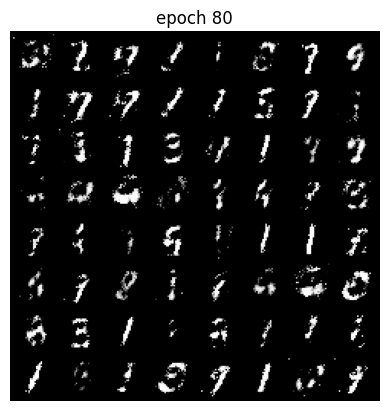

Epoch 80 of 100
Generator loss: 2.33804847, Discriminator loss: 0.67543451


118it [00:38,  3.03it/s]                                                                                               


Epoch 81 of 100
Generator loss: 2.48450966, Discriminator loss: 0.65384442


118it [00:38,  3.05it/s]                                                                                               


Epoch 82 of 100
Generator loss: 2.37650280, Discriminator loss: 0.66654510


118it [00:38,  3.05it/s]                                                                                               


Epoch 83 of 100
Generator loss: 2.40813539, Discriminator loss: 0.64204820


118it [00:38,  3.07it/s]                                                                                               


Epoch 84 of 100
Generator loss: 2.53406487, Discriminator loss: 0.64020255


118it [00:38,  3.06it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


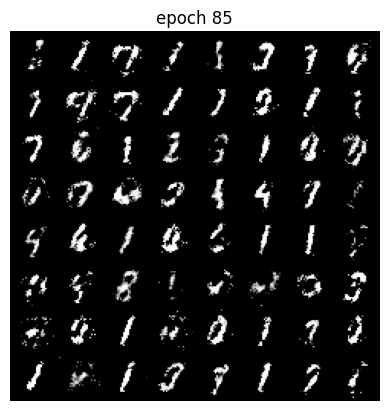

Epoch 85 of 100
Generator loss: 2.42574157, Discriminator loss: 0.65659305


118it [00:38,  3.07it/s]                                                                                               


Epoch 86 of 100
Generator loss: 2.34643212, Discriminator loss: 0.67324069


118it [00:38,  3.07it/s]                                                                                               


Epoch 87 of 100
Generator loss: 2.21477520, Discriminator loss: 0.71369492


118it [00:38,  3.06it/s]                                                                                               


Epoch 88 of 100
Generator loss: 2.02834616, Discriminator loss: 0.75332581


118it [00:38,  3.07it/s]                                                                                               


Epoch 89 of 100
Generator loss: 2.17031347, Discriminator loss: 0.72305505


118it [00:38,  3.07it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


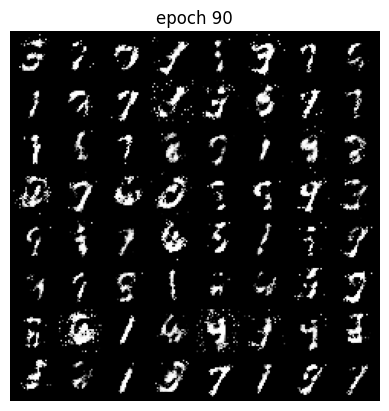

Epoch 90 of 100
Generator loss: 2.01264459, Discriminator loss: 0.78646790


118it [00:38,  3.04it/s]                                                                                               


Epoch 91 of 100
Generator loss: 2.06194293, Discriminator loss: 0.75708193


118it [00:38,  3.07it/s]                                                                                               


Epoch 92 of 100
Generator loss: 2.16087313, Discriminator loss: 0.70283154


118it [00:38,  3.06it/s]                                                                                               


Epoch 93 of 100
Generator loss: 2.07457535, Discriminator loss: 0.74454162


118it [00:38,  3.04it/s]                                                                                               


Epoch 94 of 100
Generator loss: 2.06196407, Discriminator loss: 0.76078644


118it [00:38,  3.06it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


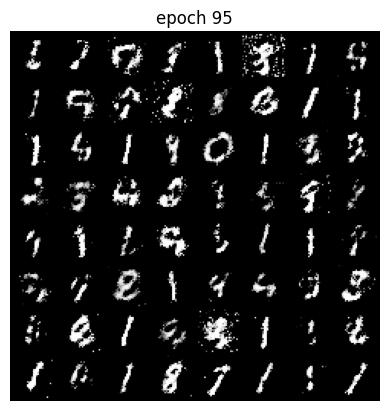

Epoch 95 of 100
Generator loss: 2.20816337, Discriminator loss: 0.72433163


118it [00:38,  3.04it/s]                                                                                               


Epoch 96 of 100
Generator loss: 2.02462878, Discriminator loss: 0.76515672


118it [00:38,  3.05it/s]                                                                                               


Epoch 97 of 100
Generator loss: 2.01247434, Discriminator loss: 0.78850875


118it [00:38,  3.06it/s]                                                                                               


Epoch 98 of 100
Generator loss: 1.95513897, Discriminator loss: 0.82967340


118it [00:38,  3.06it/s]                                                                                               


Epoch 99 of 100
Generator loss: 1.90569421, Discriminator loss: 0.79619292


118it [00:38,  3.05it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


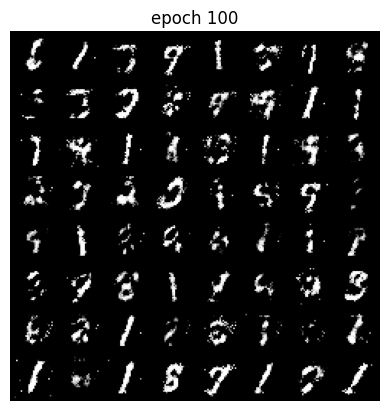

Epoch 100 of 100
Generator loss: 1.94519424, Discriminator loss: 0.80834073


In [15]:
torch.manual_seed(7777)

# Pass image data through (x), generate guess, calculate loss
def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########

    loss = criterion(output, true_label)
    loss.backward()
    optim_g.step()
    return loss

# Pass 
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
        
    loss_real = criterion(output, true_label)
    output_fake = discriminator(data_fake)
    loss_fake = criterion(output_fake, fake_label)
    loss_real.backward()
    loss_fake.backward()
    optim_d.step()
    return loss_real + loss_fake
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    # bi is index
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        
        image, _ = data
        image = image.to(device)
        b_size = len(image)
        # run the discriminator for k number of steps
        for step in range(k):
            data_fake = generator(create_noise(b_size, nz)).detach()
            data_real = image
            
            b_size = data_real.size(0)
            true_label = label_real(b_size)
            fake_label = label_fake(b_size)
            optim_d.zero_grad()
            output = discriminator(data_real)
            
            loss_d += discriminator_loss(output, true_label).item()
        
        data_fake = generator(create_noise(b_size, nz))
        
        b_size = data_fake.size(0)
        real_label = label_real(b_size)
        optim_g.zero_grad()
        output = discriminator(data_fake)
        
        loss_g += generator_loss(output, true_label).item()
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [16]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [17]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

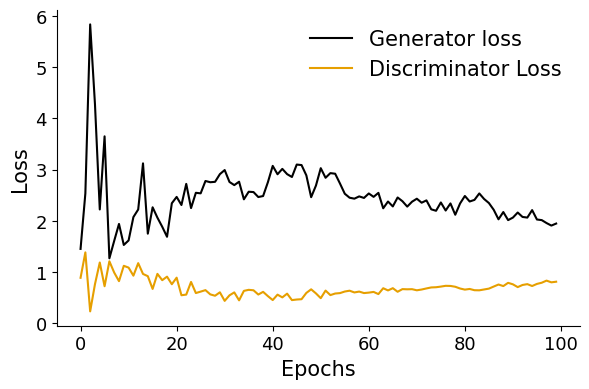

In [28]:
colors={"b":"#000000","o":"#E69F00"}
fsize, ax = get_ax()


plt.plot(losses_g, c=colors["b"], label='Generator loss')
plt.plot(losses_d, c=colors["o"], label='Discriminator Loss')

plt.xlabel("Epochs", size=fsize)
plt.ylabel("Loss", size=fsize)

plt.xticks(size=fsize-2)
plt.yticks(size=fsize-2)

plt.legend(fontsize=fsize, frameon=False)

plt.tight_layout()
plt.savefig('outputs/loss.png')

In [ ]:
### TEST CELL ###
# for bi, data in enumerate(train_loader):
#     samples = data[0]
#     reals = data[1]
    
#     print(bi)
#     print(samples.shape[0])
#     print(reals.shape)

In [ ]:
# for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
#     images = data[0]
#     reals = data[1]
#     print(reals[bi])

# new gen rule true_label -> fake_label in gen_loss

In [16]:
losses_gb = [] # to store generator loss after each epoch
losses_db = [] # to store discriminator loss after each epoch
images_b = [] # to store images generatd by the generator

In [ ]:
torch.manual_seed(7777)

# Pass image data through (x), generate guess, calculate loss
def generator_loss(output, fake_label):
    ############ YOUR CODE HERE ##########

    loss = criterion(output, fake_label)
    loss.backward()
    optim_g.step()
    return loss

def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
        
    loss_real = criterion(output, true_label)
    output_fake = discriminator(data_fake)
    loss_fake = criterion(output_fake, fake_label)
    loss_real.backward()
    loss_fake.backward()
    optim_d.step()
    return loss_real + loss_fake
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    # bi is index
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        
        image, _ = data
        image = image.to(device)
        b_size = len(image)
        # run the discriminator for k number of steps
        for step in range(k):
            data_fake = generator(create_noise(b_size, nz)).detach()
            data_real = image
            
            b_size = data_real.size(0)
            true_label = label_real(b_size)
            fake_label = label_fake(b_size)
            optim_d.zero_grad()
            output = discriminator(data_real)
            
            loss_d += discriminator_loss(output, true_label).item()
        
        data_fake = generator(create_noise(b_size, nz))
        
        b_size = data_fake.size(0)
        real_label = label_real(b_size)
        optim_g.zero_grad()
        output = discriminator(data_fake)
        
        loss_g += generator_loss(output, fake_label).item()
        
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs_B/gen_img{epoch+1}.png")
    images_b.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_gb.append(epoch_loss_g)
    losses_db.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

118it [00:38,  3.09it/s]                                                                                               


Epoch 1 of 100
Generator loss: 0.06002177, Discriminator loss: 0.08274147


118it [00:37,  3.11it/s]                                                                                               


Epoch 2 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


 36%|█████████████████████████████                                                    | 42/117 [00:13<00:24,  3.09it/s]